In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = './AB_NYC_2019.csv'
df = pd.read_csv(path)
print(df.head())
print(df.shape)
print(df.shape[0])
print(df.shape[1])
print(df.index)

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
pd.DataFrame(df.isnull().sum(), columns = ['Count Null'])

,Count Null
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [4]:
def to_today(date1):
    date2= datetime.datetime.strptime('2019-12-31',"%Y-%m-%d")
    if date1<date2:
        num=(date2-date1).days
        return num
    else:
        return 100000
df['last_review'] = pd.to_datetime(df['last_review'])
df['reviews_per_month'].fillna(0, inplace = True)
df['last_review_to_today'] = df['last_review'].apply(lambda x:to_today(x))
df.drop(['id','host_id','host_name','last_review'], axis=1, inplace=True) 

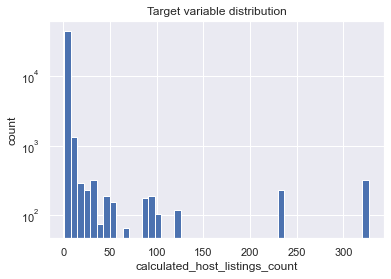

In [5]:
sns.set(font_scale = 1)
df['calculated_host_listings_count'].plot.hist(bins = df['calculated_host_listings_count'].nunique(),log=True)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('count')
plt.title('Target variable distribution')
plt.savefig('Target variable distribution.jpg',bbox_inches='tight',dpi=500)
plt.show()

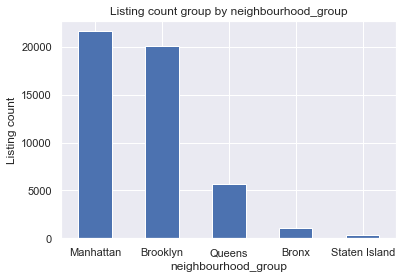

In [6]:
viz_nbhg = df.neighbourhood_group.value_counts().plot(kind = 'bar')
viz_nbhg.set_xticklabels(viz_nbhg.get_xticklabels(), rotation=0)
viz_nbhg.set_title('Listing count group by neighbourhood_group')
viz_nbhg.set_xlabel('neighbourhood_group')
viz_nbhg.set_ylabel('Listing count')
fig = viz_nbhg.get_figure()
fig.savefig("Listing count group by neighbourhood_group.jpg",dpi=500)

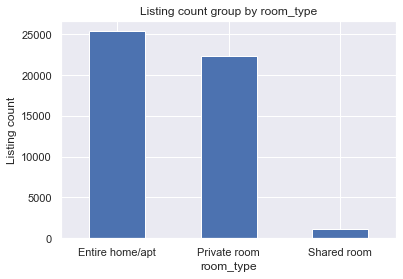

In [7]:
viz_rm = df.room_type.value_counts().plot(kind = 'bar')
viz_rm.set_xticklabels(viz_rm.get_xticklabels(), rotation = 0)
viz_rm.set_title('Listing count group by room_type')
viz_rm.set_xlabel('room_type')
viz_rm.set_ylabel('Listing count')
fig = viz_rm.get_figure()
fig.savefig("Listing count group by room_type.jpg",dpi=500)

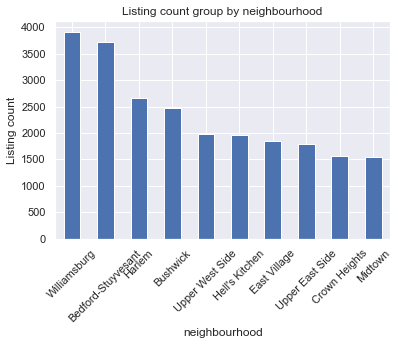

In [8]:
viz_nbh = df.neighbourhood.value_counts().head(10).plot(kind= 'bar')
viz_nbh.set_xticklabels(viz_nbh.get_xticklabels(), rotation=45)
viz_nbh.set_title('Listing count group by neighbourhood')
viz_nbh.set_xlabel('neighbourhood')
viz_nbh.set_ylabel('Listing count')
fig = viz_nbh.get_figure()
fig.savefig("Listing count group by neighbourhood.jpg",dpi=500)

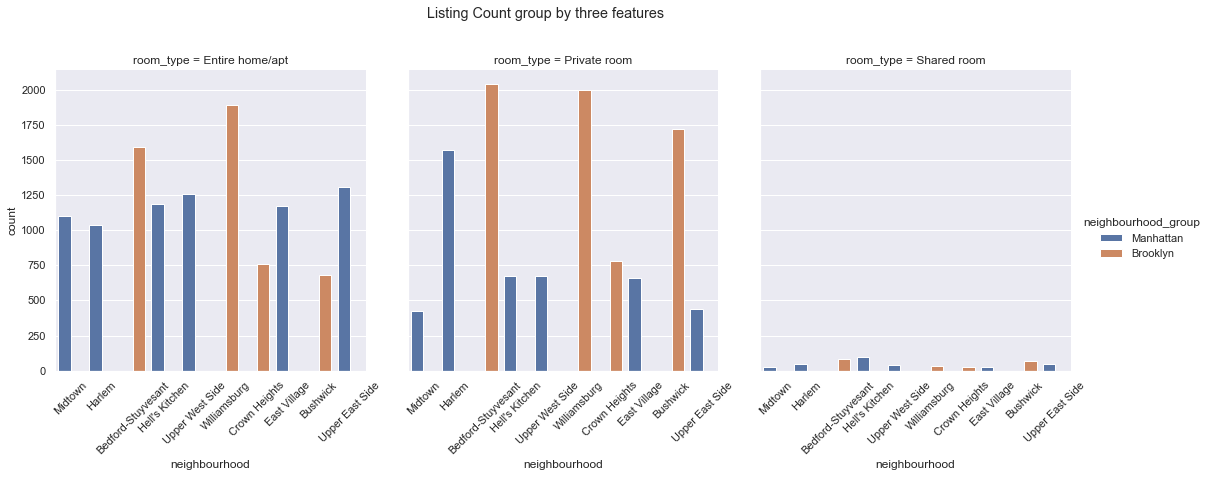

In [9]:
cp = sns.catplot(x = 'neighbourhood', hue = 'neighbourhood_group', col = 'room_type', 
            data = df.loc[df['neighbourhood'].isin( df.neighbourhood.value_counts().head(10).index)],
            kind = 'count').set_xticklabels(rotation=45)
cp.fig.suptitle('Listing Count group by three features',x=0.45,y=1.1)
cp.savefig("Listing Count group by three features.jpg",dpi=500)

Proportion of data sets：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


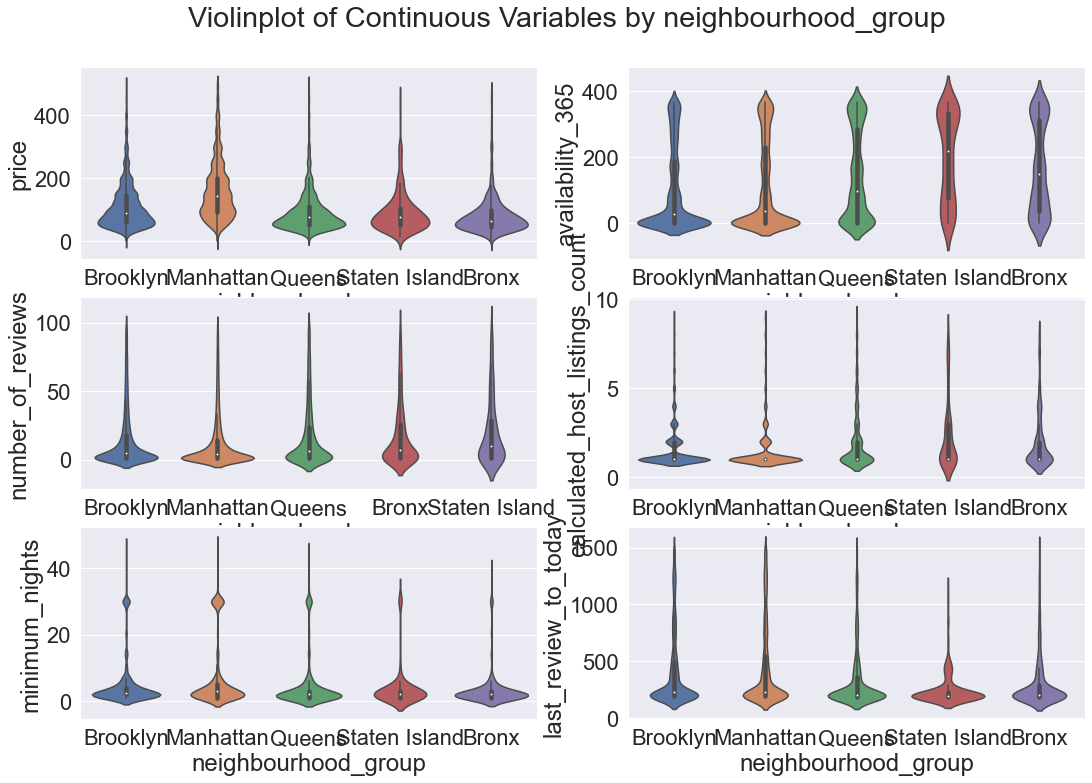

In [12]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(df[df.price<500])/len(df)
ax_2_per = 100*len(df)/len(df)
ax_3_per = 100*len(df[df.number_of_reviews<100])/len(df)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
ax_5_per = 100*len(df[df.minimum_nights < 50])/len(df)
ax_6_per = 100*len(df[df.last_review_to_today<1500])/len(df)

print('Proportion of data sets：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.set(font_scale = 2)
sns.violinplot(x = 'neighbourhood_group', y = 'price',data = df[df.price<500],ax=ax1)
sns.violinplot(x = 'neighbourhood_group', y = 'availability_365',data = df, ax = ax2)
sns.violinplot(x = 'neighbourhood_group', y = 'number_of_reviews',data = df[df.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'neighbourhood_group', y = 'minimum_nights',data = df[df.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'neighbourhood_group', y = 'last_review_to_today',data = df[df.last_review_to_today<1500], ax= ax6)
fig.suptitle('Violinplot of Continuous Variables by neighbourhood_group',x=0.5,y=0.95)
fig.savefig("Violinplot of Continuous Variables by neighbourhood_group.jpg",dpi=500)

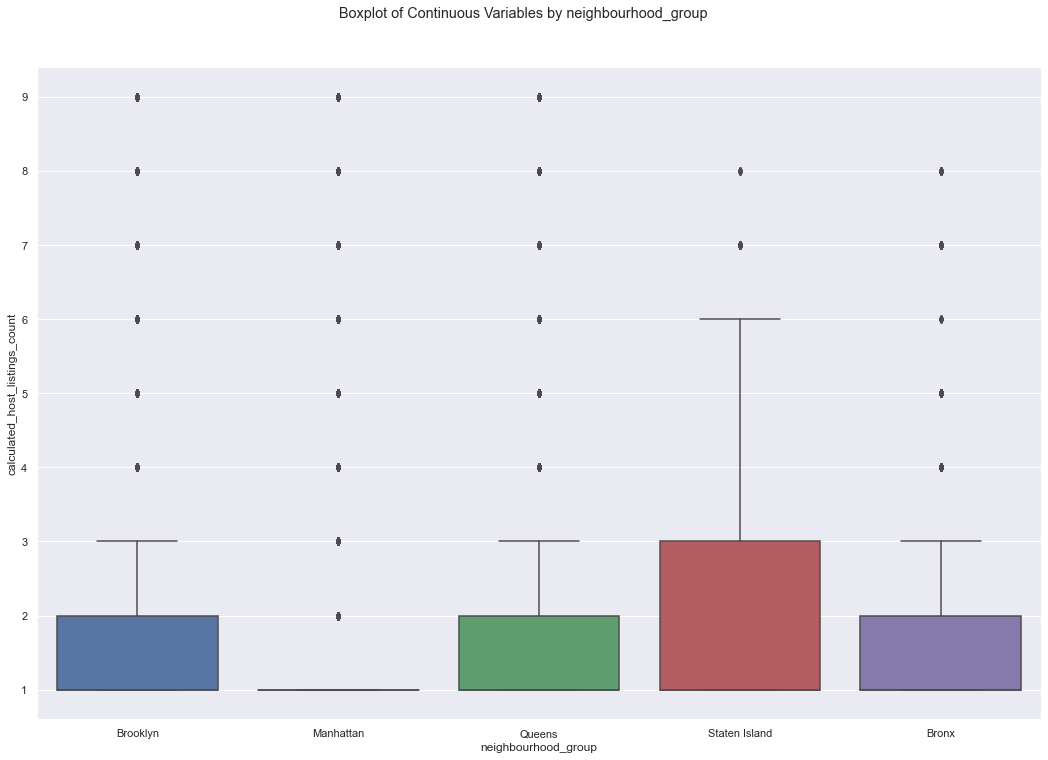

In [13]:
fig=plt.figure(4,figsize=(18,12))
sns.set(font_scale = 1)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
sns.boxplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10])
fig.suptitle('Boxplot of Continuous Variables by neighbourhood_group',x=0.5,y=0.95)
fig.savefig("Boxplot of Continuous Variables by neighbourhood_group.jpg",dpi=500)

Proportion of data sets：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


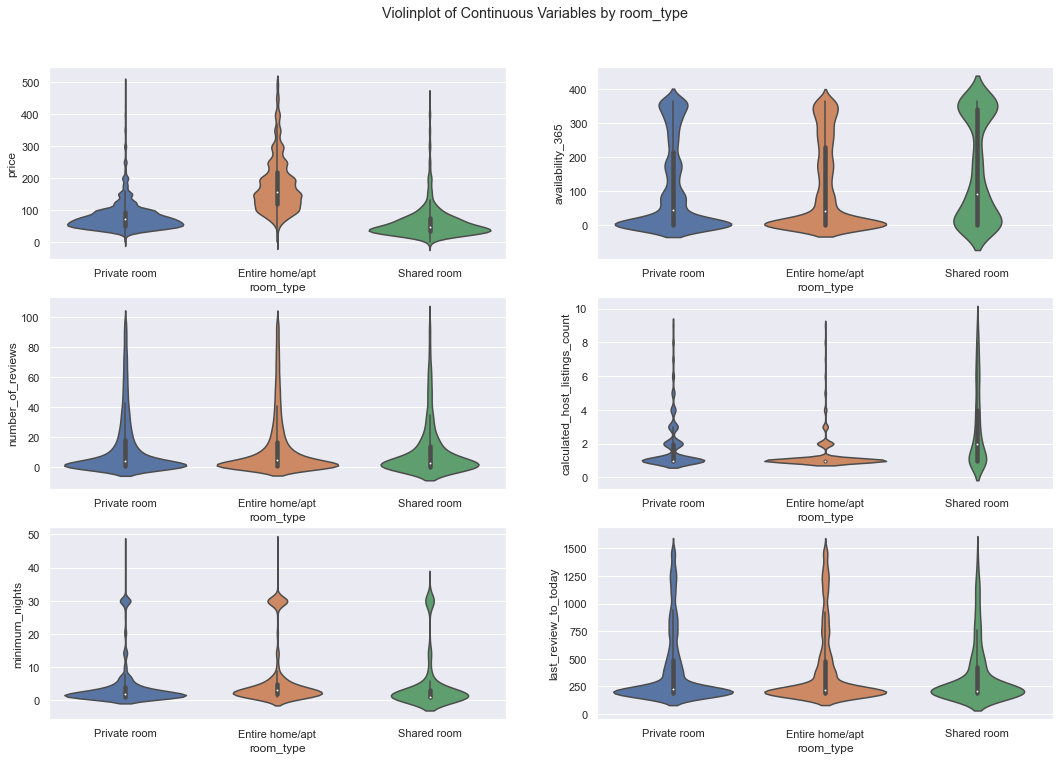

In [14]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(df[df.price<500])/len(df)
ax_2_per = 100*len(df)/len(df)
ax_3_per = 100*len(df[df.number_of_reviews<100])/len(df)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
ax_5_per = 100*len(df[df.minimum_nights < 50])/len(df)
ax_6_per = 100*len(df[df.last_review_to_today<1500])/len(df)

print('Proportion of data sets：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.violinplot(x = 'room_type', y = 'price',data = df[df.price<500], ax = ax1)
sns.violinplot(x = 'room_type', y = 'availability_365',data = df, ax = ax2)
sns.violinplot(x = 'room_type', y = 'number_of_reviews',data = df[df.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'room_type', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'room_type', y = 'minimum_nights',data = df[df.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'room_type', y = 'last_review_to_today',data = df[df.last_review_to_today<1500], ax= ax6)
fig.suptitle('Violinplot of Continuous Variables by room_type',x=0.5,y=0.95)
fig.savefig("Violinplot of Continuous Variables by room_type.jpg",dpi=500)

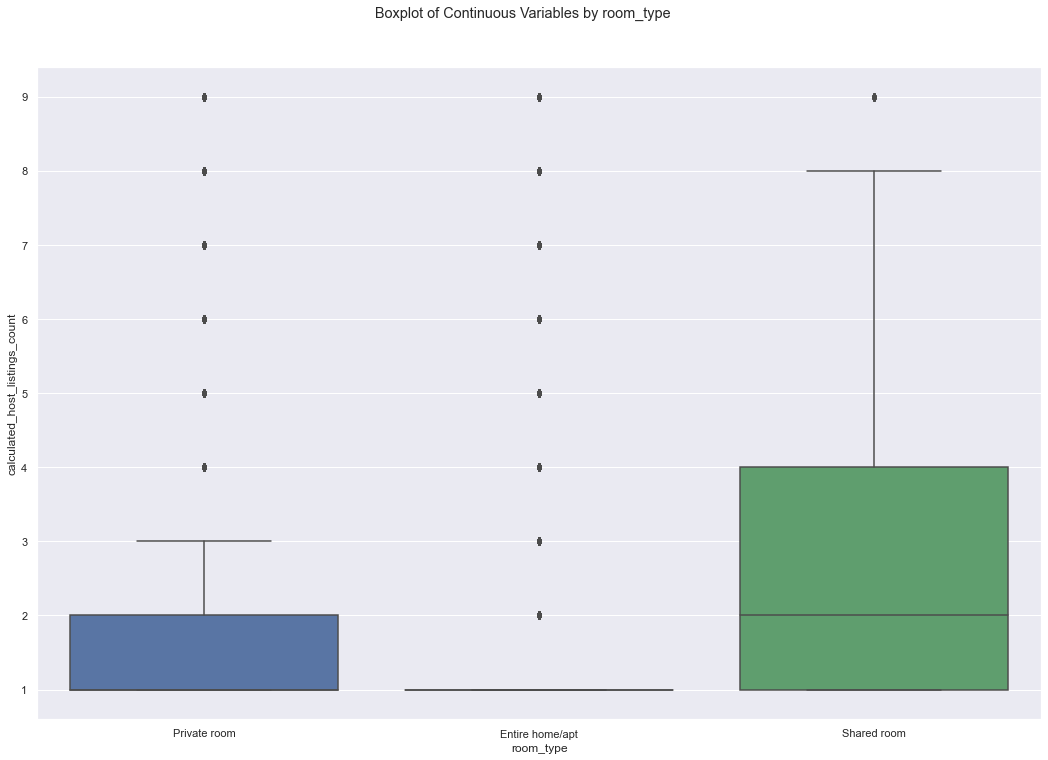

In [15]:
fig=plt.figure(4,figsize=(18,12))
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
sns.boxplot(x = 'room_type', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10])
fig.suptitle('Boxplot of Continuous Variables by room_type',x=0.5,y=0.95)
fig.savefig("Boxplot of Continuous Variables by room_type.jpg",dpi=500)

In [62]:
#sns.scatterplot(data = df,x='calculated_host_listings_count',y='price')

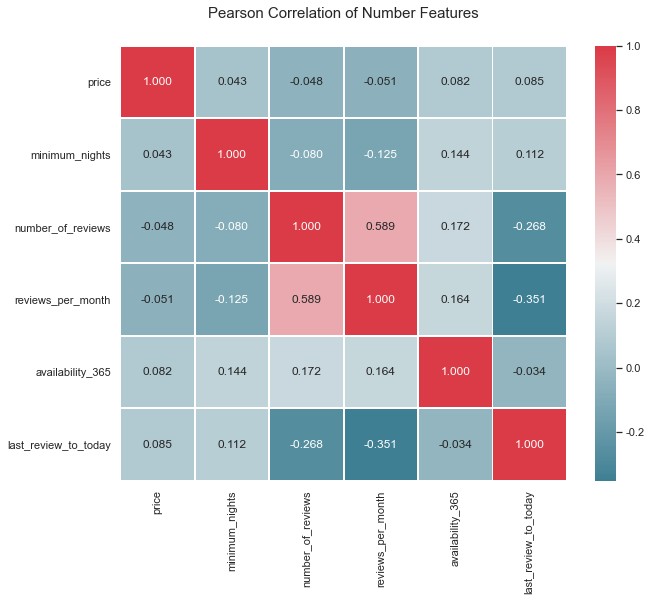

In [16]:
num_field = [
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'availability_365',
'last_review_to_today',
]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[num_field].corr(),annot=True,
                    cmap = sns.diverging_palette(220, 10, as_cmap = True),
                    linewidths=.9, fmt= '.3f',ax = ax)
plt.title('Pearson Correlation of Number Features', y=1.05, size=15)
plt.savefig('Pearson Correlation of Number Features.jpg',dpi=500)

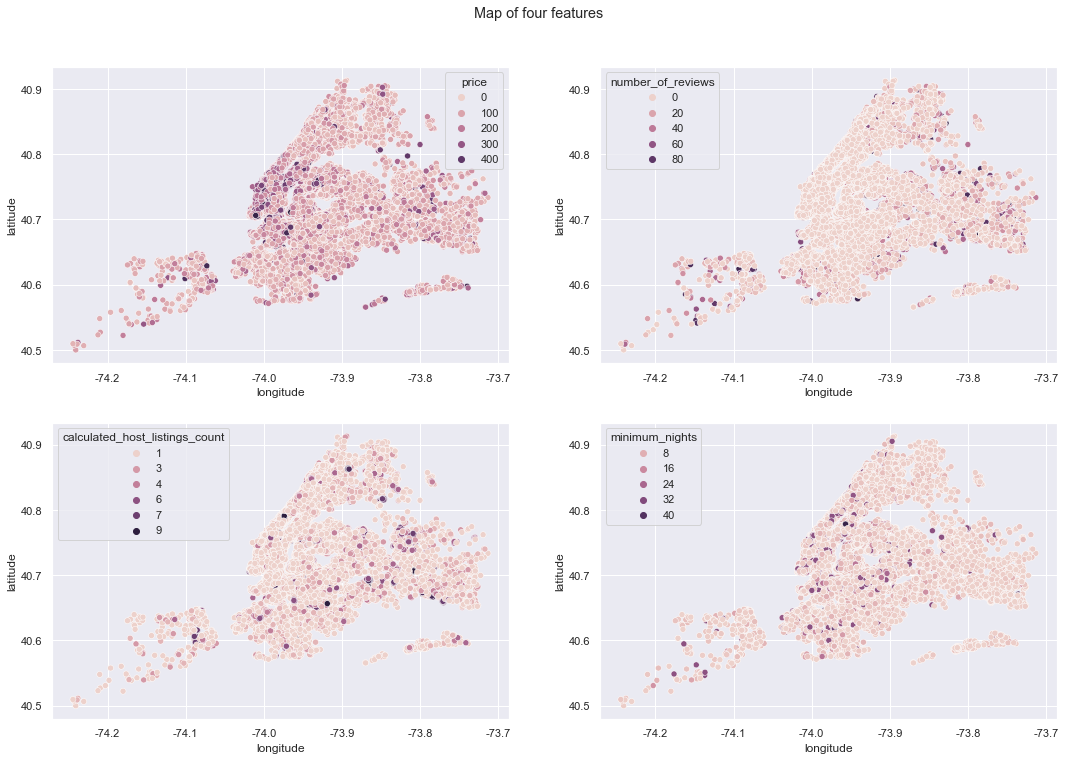

In [17]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.scatterplot(x= 'longitude', y='latitude', hue = 'price', data = df[df.price < 500], ax=ax1)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'number_of_reviews', data = df[df.number_of_reviews<100], ax=ax2)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'calculated_host_listings_count', data = df[df.calculated_host_listings_count<10], ax=ax3)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'minimum_nights', data = df[df.minimum_nights < 50], ax=ax4)
fig.suptitle('Map of four features',x=0.5,y=0.95)
fig.savefig("Map of four features.jpg",dpi=500)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
import xgboost
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from  sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from  sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import ssl
from sklearn.metrics import r2_score
import random
import warnings
warnings.filterwarnings("ignore")
df2 = df.copy()
df2.drop(columns=['name'],inplace=True)
y = df2['calculated_host_listings_count']
df2.drop(columns=['calculated_host_listings_count'],inplace=True)

cat_ftrs = ['neighbourhood_group', 'neighbourhood']
ordinal_ftrs = ['room_type']
ordinal_cats = [['Entire home/apt','Private room','Shared room']]
num_ftrs = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','last_review_to_today']
# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])
RMSE_Mean = []
RMSE_Std = []

In [19]:
def MLpipe_KFold_RMSE(df, y,preprocessor,L1,param_grid):
    # the parameters of some ML algorithms have the same name and this is how we avoid confusion
    nr_states = 1
    test_scores = np.zeros(nr_states)
    r2_scores = np.zeros(nr_states)
    for i in range(nr_states):
        #print('randoms state '+str(i+1))
        
        X_other, X_test, y_other, y_test = train_test_split(df, y, test_size=0.2, random_state=42*i)
        X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42*i)
        
    
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', L1)])
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(mean_squared_error, greater_is_better=False, 
                                                                              squared=False), cv=kf, 
                            return_train_score = True, n_jobs=-1, verbose=True)
        # this line actually fits the model on other
        grid.fit(X_train, y_train)
        best_parameters = grid.best_params_
        # save results into a data frame. feel free to print it and inspect it
        #results = pd.DataFrame(grid.cv_results_)
        #print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        #final_models.append(grid.best_estimator_)
        # calculate and save the test score
        y_test_pred = grid.predict(X_test)
        test_scores[i] = mean_squared_error(y_test,y_test_pred,squared=False)
        r2_scores[i] = r2_score(y_test,y_test_pred)
        #print('test score:',test_scores[i])
    return test_scores,r2_scores,pipe,grid

In [23]:
#baseline
from random import seed
from random import randrange
from sklearn.linear_model import LinearRegression # import the model
def baseline_RMSE(X, y):
    n_states = 10
    all_baseline_rmse = np.zeros(n_states)
    for i in range(n_states):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        
        y_test_baseline = np.full(y_test.shape, np.mean(y_train))
        all_baseline_rmse[i] = np.sqrt(mean_squared_error(y_test,y_test_baseline))
    
    return all_baseline_rmse,
baseline_rmse = baseline_RMSE(df2, y)
RMSE_Mean.append(np.mean(baseline_rmse))
RMSE_Std.append(np.std(baseline_rmse))
print('mean:', np.mean(baseline_rmse), 'std:', np.std(baseline_rmse))

mean: 32.82051029992705 std: 1.4974989447832707


In [25]:
# run l1 regularized linear regression to test your function in this cell
L1 = Lasso()
param_grid = {
              'regressor__fit_intercept':[True],
              'regressor__precompute':[True],
              'regressor__random_state':[1,42,84,128,170],
              'regressor__selection':['random'],
              'regressor__max_iter':[100000],
              'regressor__alpha': np.logspace(-7,0,5)
              } 
#L1 = Lasso(max_iter=100000)

#param_grid = {'regressor__alpha': np.logspace(-7,0,5)}
L1_test_scores,L1_r2_scores,L1_pipe,L1_grid = MLpipe_KFold_RMSE(df2, y, preprocessor,L1,param_grid)
print('mean:', np.mean(L1_test_scores), 'std:', np.std(L1_test_scores))
RMSE_Mean.append(np.mean(L1_test_scores))
RMSE_Std.append(np.std(L1_test_scores))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
mean: 27.454364742523826 std: 0.0


In [26]:
#linear regression with l2 regularization
L2 = Ridge()
param_grid = {              
              'regressor__fit_intercept':[True],
              'regressor__solver':['saga'],
              'regressor__random_state':[1,42,84,128,170],
              'regressor__max_iter':[100000],
              'regressor__alpha': np.logspace(-7,0,5)}
L2_test_scores,L2_r2_scores,L2_pipe,L2_grid = MLpipe_KFold_RMSE(df2, y, preprocessor, L2, param_grid)
print(L2_test_scores)
print('mean:', np.mean(L2_test_scores), 'std:', np.std(L2_test_scores))
RMSE_Mean.append(np.mean(L2_test_scores))
RMSE_Std.append(np.std(L2_test_scores))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[27.4661931]
mean: 27.46619309556135 std: 0.0


In [27]:
#linear regression with an elastic net
Elastic_net = ElasticNet()
param_grid = {
             'regressor__alpha': np.logspace(-7,0,5),
             'regressor__l1_ratio': [0.1,0.2,0.3],
             #'regressor__max_iter':[100000]
             #'regressor__tol':[1e-4],
             #'regressor__selection':['random']
             }
EN_test_scores,EN_r2_scores,EN_pipe,EN_grid = MLpipe_KFold_RMSE(df2, y, preprocessor, Elastic_net, param_grid)
print(EN_test_scores)
print('mean:', np.mean(EN_test_scores), 'std:', np.std(EN_test_scores))
RMSE_Mean.append(np.mean(EN_test_scores))
RMSE_Std.append(np.std(EN_test_scores))

Fitting 4 folds for each of 15 candidates, totalling 60 fits
[27.44719323]
mean: 27.447193226684444 std: 0.0


In [38]:
#RF
RF = RandomForestRegressor()
param_grid = {
              'regressor__n_estimators':[100],
              'regressor__max_depth': [1,5,10,30],
              'regressor__min_samples_split': [2,6,10,16]}
RF_test_scores,RF_r2_scores,RF_pipe,RF_grid = MLpipe_KFold_RMSE(df2, y, preprocessor, RF, param_grid)
print(RF_test_scores)
print('mean:', np.mean(RF_test_scores), 'std:', np.std(RF_test_scores))
RMSE_Mean.append(np.mean(RF_test_scores))
RMSE_Std.append(np.std(RF_test_scores))

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[13.4730499]
mean: 13.473049895280694 std: 0.0


In [28]:
#SVR
svr = SVR()
param_grid = {'regressor__C': [0.01, 0.1, 1, 10, 100, 1000],
              'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
SVR_test_scores,SVR_r2_scores,SVR_pipe,SVR_grid = MLpipe_KFold_RMSE(df2, y, preprocessor, svr, param_grid)
print(SVR_test_scores)
print('mean:', np.mean(testscores), 'std:', np.std(testscores))
RMSE_Mean.append(np.mean(SVR_test_scores))
RMSE_Std.append(np.std(SVR_test_scores))

Fitting 4 folds for each of 42 candidates, totalling 168 fits


KeyboardInterrupt: 

In [29]:
#KNN
knn = KNeighborsRegressor()
param_grid = {
                'regressor__weights':['distance'],
                'regressor__n_neighbors': [1,10,30,100]
              }
KNN_test_scores,KNN_r2_scores,KNN_pipe,KNN_grid = MLpipe_KFold_RMSE(df2, y, preprocessor, knn, param_grid)
print(KNN_test_scores)
print('mean:', np.mean(KNN_test_scores), 'std:', np.std(KNN_test_scores))
RMSE_Mean.append(np.mean(KNN_test_scores))
RMSE_Std.append(np.std(KNN_test_scores))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[18.8656244]
mean: 18.86562439877565 std: 0.0


In [34]:
nr_states = 10
XGB_test_scores = np.zeros(nr_states)
XGB_r2_scores = np.zeros(nr_states)
XGB = xgboost.XGBRegressor()
for i in range(nr_states):
    #print('randoms state '+str(i+1))
    # let's split to train, CV, and test
    X_other, X_test, y_other, y_test = train_test_split(df2, y, test_size=0.2, random_state=42*i)
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42*i)
    # fit_transform the training set
    X_prep = preprocessor.fit_transform(X_train)
    # collect feature names
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=X_prep,columns=feature_names)
    #print(df_train.shape)
    # transform the CV
    df_CV = preprocessor.transform(X_CV)
    df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
    #print(df_CV.shape)
    # transform the test
    df_test = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=df_test,columns = feature_names)
    param_grid = {"learning_rate": [0.05],
                  "n_estimators": [200000],
                  "seed": [0],
                  "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                  "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                  "missing": [np.nan], 
                  "max_depth": [1,3,10,30,100],
                  "colsample_bytree": [0.9],              
                  "subsample": [0.66]
                 }

    kf = KFold(n_splits=4,shuffle=True,random_state=42*i)
    #-----XGBoost-----
    param_grid['random_state'] = [42*i]
    XGB.set_params(**ParameterGrid(param_grid)[0]) # ONLY THE ONE MODEL IS TRAINED HERE!
    XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_CV, y_CV)], verbose=False)
    y_CV_pred = XGB.predict(df_CV)
    #print('the CV RMSE:',np.sqrt(mean_squared_error(y_CV,y_CV_pred)))
    y_test_pred = XGB.predict(df_test)
    XGB_test_scores[i] = np.sqrt(mean_squared_error(y_test,y_test_pred))
    XGB_r2_scores[i] = r2_score(y_test,y_test_pred)
print(XGB_test_scores)
print("the average of RMSE is {} and the std of RMSE is{}".format(np.mean(XGB_test_scores),np.std(XGB_test_scores)))
RMSE_Mean.append(np.mean(XGB_test_scores))
RMSE_Std.append(np.std(XGB_test_scores))

[23.04575629 22.57869921 22.52767285 24.02630662 23.79719869 24.92528319
 23.60668271 24.20713952 23.99789494 23.96357594]
the average of RMSE is 23.667620993971344 and the std of RMSE is0.713482445802902


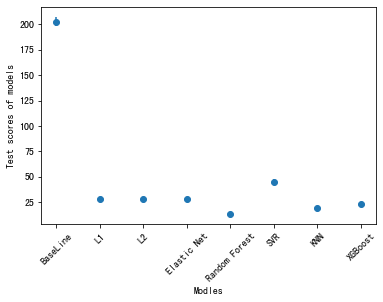

In [11]:
RMSE_Mean = [202.56,28.161214544054918,28.166449004353893,28.088159824136664,13.692193688086784,45.231841641378956,19.07940213365426,23.667620993971344]
RMSE_Std = [4.67,1.0428767291305043,1.0463665998586116,1.0314844435866952,0.8490970125104872,2.4835832918466196,0.7400494772113109,0.713482445802902]
x_ticks = ['BaseLine','L1','L2','Elastic Net','Random Forest','SVR','KNN','XGBoost']
plt.errorbar(range(8), y = RMSE_Mean, yerr = RMSE_Std,fmt = 'o')
plt.xticks(range(8),x_ticks,rotation=45)
plt.xlabel('Modles')
plt.ylabel('Test scores of models')
plt.savefig('test_scores.jpg',bbox_inches='tight',dpi=500)
plt.show()

In [9]:
from sklearn.inspection import permutation_importance
X_other, X_test, y_other, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# collect feature names
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#print(df_train.shape)
# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#print(df_CV.shape)
# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)

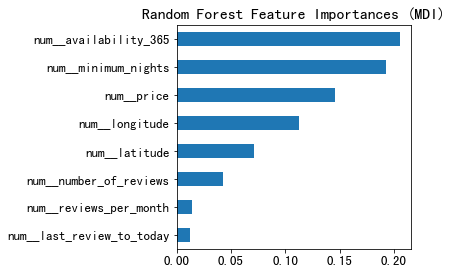

In [70]:
feature_names = RF_pipe[:-1].get_feature_names_out()
mdi_importances = pd.Series(
    RF_pipe[-1].feature_importances_[0:8], index=feature_names[0:8]
).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()
plt.savefig('MDI.jpg',bbox_inches='tight',dpi=500)

Text(0.5, 1.0, 'Feature importance expectation in Shap')

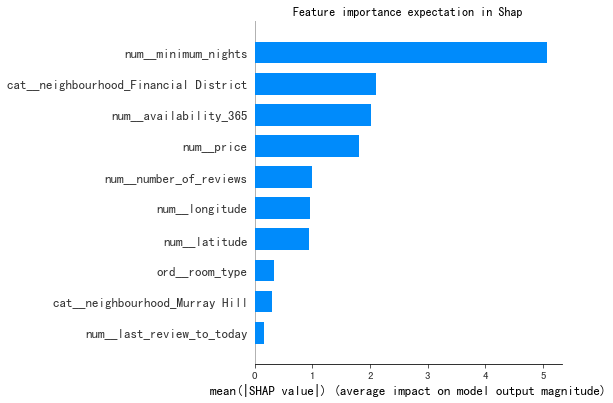

In [17]:
import shap
shap.initjs() # required for visualizations later on
explainer = shap.TreeExplainer(RF_grid.best_estimator_[1], verbosity = 0)
X = np.array(df_test)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,X,feature_names = feature_names,max_display = 10,plot_type = "bar",show=False)
plt.title("Feature importance expectation in Shap")

(9779, 233)


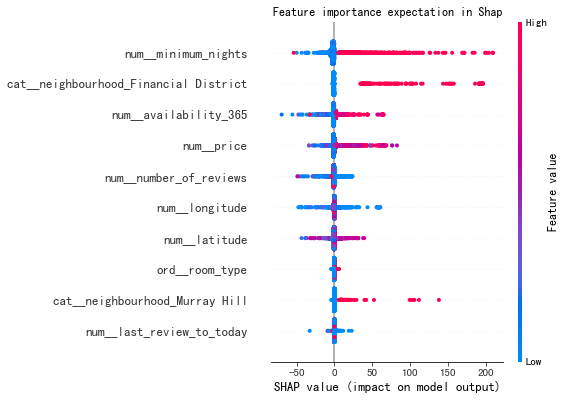

In [22]:
print(shap_values.shape)
shap.summary_plot(shap_values, df_test,max_display=10,show=False)
plt.title("Feature importance expectation in Shap")
plt.savefig('SHAPE value.jpg',bbox_inches='tight',dpi=500)

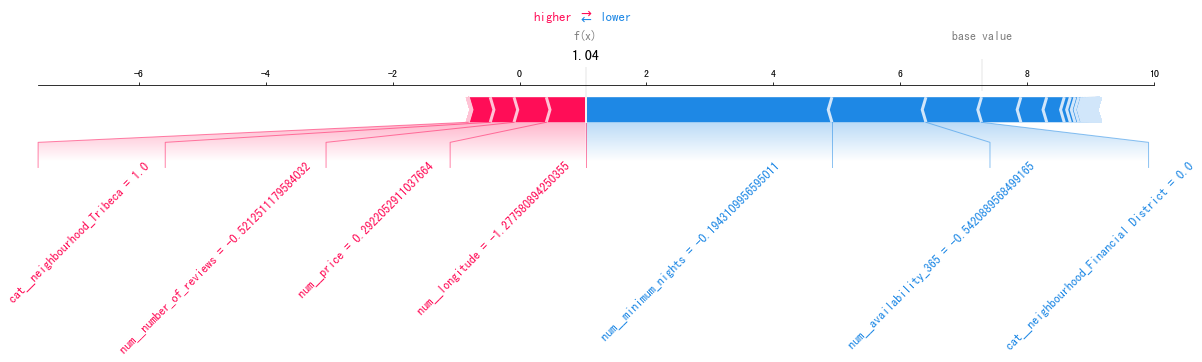

In [60]:
shap.force_plot(explainer.expected_value, shap_values[0,:] ,df_test.iloc[0,:],feature_names=feature_names,show=False,matplotlib=True,text_rotation=45)
#plt.title("SHAP value for local importance")
plt.savefig('local value.jpg',bbox_inches='tight',dpi=500)

In [26]:
def ML_pipeline_kfolds(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    cat_ftrs = ['neighbourhood_group', 'neighbourhood']
    ordinal_ftrs = ['room_type']
    ordinal_cats = [['Entire home/apt','Private room','Shared room']]
    num_ftrs = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','last_review_to_today']
    # one-hot encoder
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

    # ordinal encoder
    ordinal_transformer = Pipeline(steps=[
        ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
        ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_ftrs),
            ('cat', categorical_transformer, cat_ftrs),
            ('ord', ordinal_transformer, ordinal_ftrs)])
    pipe = make_pipeline(preprocessor,RandomForestRegressor())
    # the parameter(s) we want to tune
    param_grid = {}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

In [27]:
from sklearn.model_selection import StratifiedKFold
model, X_test, y_test = ML_pipeline_kfolds(df2,y,42,4)
ftr_names = df2.columns
np.random.seed(42)
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])
test_score = model.score(X_test,y_test)
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(model.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

Fitting 4 folds for each of 1 candidates, totalling 4 fits
shuffling neighbourhood_group
   shuffled test score: 0.853 +/- 0.001
shuffling neighbourhood
   shuffled test score: 0.398 +/- 0.01
shuffling latitude
   shuffled test score: 0.755 +/- 0.007
shuffling longitude
   shuffled test score: 0.477 +/- 0.009
shuffling room_type
   shuffled test score: 0.848 +/- 0.001
shuffling price
   shuffled test score: 0.642 +/- 0.017
shuffling minimum_nights
   shuffled test score: 0.267 +/- 0.024
shuffling number_of_reviews
   shuffled test score: 0.711 +/- 0.015
shuffling reviews_per_month
   shuffled test score: 0.848 +/- 0.003
shuffling availability_365
   shuffled test score: 0.519 +/- 0.025
shuffling last_review_to_today
   shuffled test score: 0.838 +/- 0.003


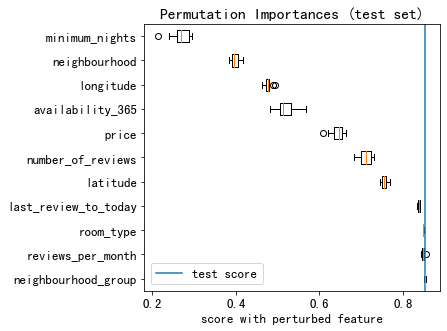

In [25]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,4.8))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('Permutation.jpg',bbox_inches='tight',dpi=500)
plt.show()

In [79]:
X_other, X_test, y_other, y_test = train_test_split(df2, y, test_size=0.2, random_state=0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# collect feature names
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#print(df_train.shape)
# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#print(df_CV.shape)
# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
#RF_pipe.fit(X_train,y_train)

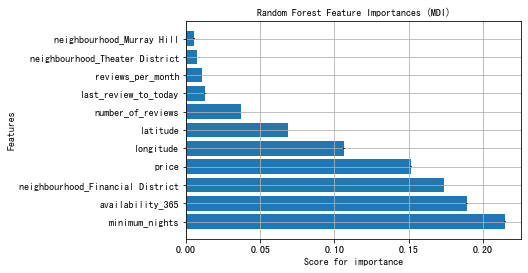

In [161]:
forest=RF_pipe[-1]
importances = pd.DataFrame(forest.feature_importances_)
std = pd.DataFrame(np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0))
#feature_names = list(preprocessor.named_transformers_['cat'][1].get_feature_names(cat_ftrs)) + preprocessor.transformers_[1][-1] + preprocessor.transformers_[2][-1]
importances.index = feature_names
std.index = feature_names
forest = pd.concat([importances, std], axis=1)
forest.columns=['import','std']
forest = forest.sort_values(by=['import'], ascending=False)
forest_15=forest[:11]
#plt.figure(figsize=(41,20))
x = []
for i in range(len(forest_15.index)):
    x.append(forest_15.index[i][5:])
plt.barh(x,forest_15['import'],yerr=forest_15['std'])
plt.title("Random Forest Feature Importances (MDI)",fontsize = 10)
plt.ylabel('Features',fontsize = 10)
plt.xlabel('Score for importance',fontsize = 10)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.savefig('RF feature Importance.png', bbox_inches='tight',dpi=500, format='png')
plt.show()

In [39]:
import pickle
file = open('lasso_models_tuned.save', 'wb')
pickle.dump(L1_grid, file)
file.close()

file = open('ridge_models_tuned.save', 'wb')
pickle.dump(L2_grid, file)
file.close()

file = open('elasticnet_models_tuned.save', 'wb')
pickle.dump(EN_grid, file)
file.close()

file = open('rf_models_tuned.save', 'wb')
pickle.dump(RF_grid, file)
file.close()

file = open('knn_models_tuned.save', 'wb')
pickle.dump(KNN_grid, file)
file.close()

file = open('xgb_models_tuned.save', 'wb')
pickle.dump(KNN_grid, file)
file.close()